In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pylab as pl

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import os
datasetDict = {}
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        datasetDict[filename] = dirname+'/'+filename
# Any results you write to the current directory are saved as output.

In [2]:
df = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Foundations/Project/cleaned_credit.csv')

# 2. Clustering
### 2.1 Clustering Analysis by K-means
#### 2.1.1 Choice of attributes and distance function

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
scaler = MinMaxScaler()
cont_var = ['Current_Loan_Amount', 'Annual_Income', 'Monthly_Debt', 'Current_Credit_Balance', 'Maximum_Open_Credit', 'Years_of_Credit_History', 'Number_of_Open_Accounts']#,'Credit_Score''Number_of_Credit_Problems']
x = df[cont_var].values #returns a numpy array
kdfS = scaler.fit_transform(x)
k = pd.DataFrame(kdfS)

In [5]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
sse = []
sil = []
kmeans_list = []
for n in range_n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(k)
    hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
    silhouette = silhouette_score(k, kmeans.labels_)
    print(f'Number of clusters {n} ')
    print('Labels %s' % dict(zip(bins, hist)))
    print('SSE %s' % kmeans.inertia_)
    print('Silhouette score %s' % silhouette)
    sse.append(kmeans.inertia_)
    sil.append(silhouette)
    kmeans_list.append(kmeans)

Number of clusters 2 
Labels {0: 51135, 1: 29588}
SSE 13466.557545689628
Silhouette score 0.27509417800711244
Number of clusters 3 
Labels {0: 37888, 1: 16508, 2: 26327}
SSE 12081.750356039243
Silhouette score 0.18655824372483362
Number of clusters 4 
Labels {0: 16812, 1: 31661, 2: 10991, 3: 21259}
SSE 10958.770291800227
Silhouette score 0.18137363213361035
Number of clusters 5 
Labels {0: 27332, 1: 13774, 2: 12474, 3: 16616, 4: 10527}
SSE 10074.45922571545
Silhouette score 0.17759819949574615
Number of clusters 6 
Labels {0: 13144, 1: 15531, 2: 11625, 3: 8187, 4: 7890, 5: 24346}
SSE 9479.874563437164
Silhouette score 0.1681623625842257
Number of clusters 7 
Labels {0: 10863, 1: 6952, 2: 12656, 3: 8491, 4: 22090, 5: 12151, 6: 7520}
SSE 8990.453526629333
Silhouette score 0.15921135238092773
Number of clusters 8 
Labels {0: 6789, 1: 19840, 2: 13045, 3: 10006, 4: 6891, 5: 6198, 6: 11618, 7: 6336}
SSE 8648.329392068914
Silhouette score 0.15738650033114834
Number of clusters 9 
Labels {0: 7

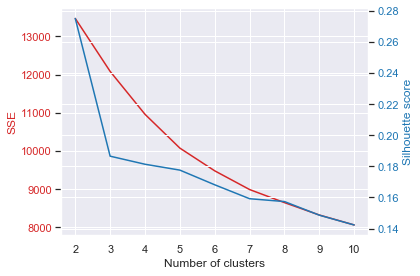

In [29]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("SSE", color=color)
#ax1.plot(list(sse.keys()), list(sse.values()), color=color)
ax1.plot(range_n_clusters,sse, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette score', color=color)  # we already handled the x-label with ax1
#ax2.plot(list(sil.keys()), list(sil.values()), color=color)
ax2.plot(range_n_clusters,sil, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [7]:
n = 3
kmeans = kmeans_list[n]
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
silhouette = silhouette_score(kdfS, kmeans.labels_)
print(f'Number of clusters {n+2} ')
print('Labels %s' % dict(zip(bins, hist)))
print('SSE %s' % kmeans.inertia_)
print('Silhouette score %s' % silhouette)

Number of clusters 5 
Labels {0: 27332, 1: 13774, 2: 12474, 3: 16616, 4: 10527}
SSE 10074.45922571545
Silhouette score 0.17759819949574615


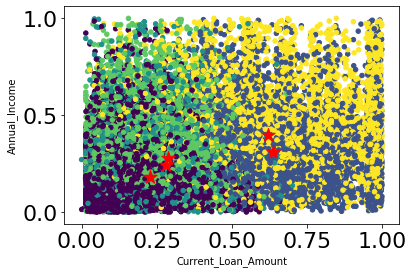

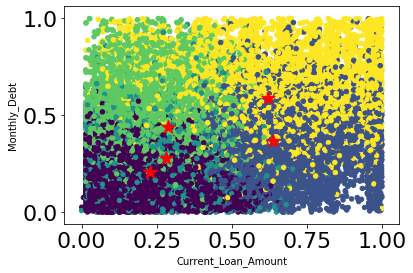

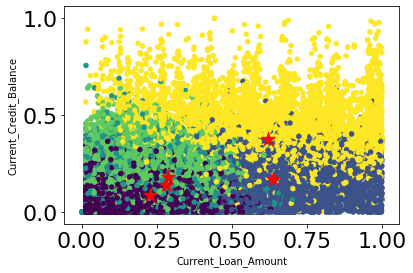

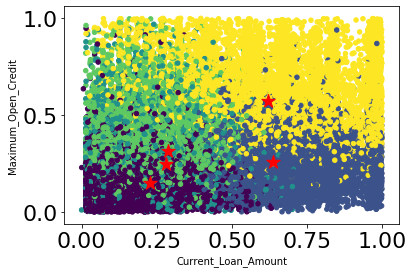

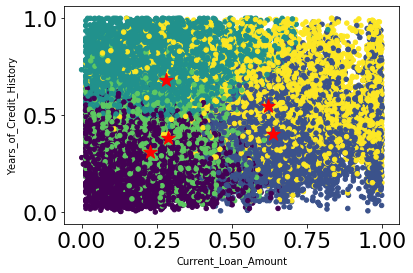

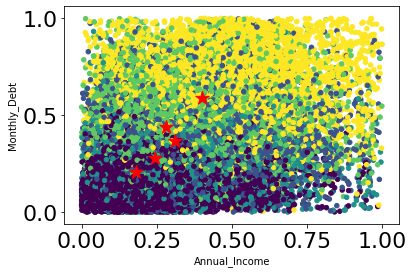

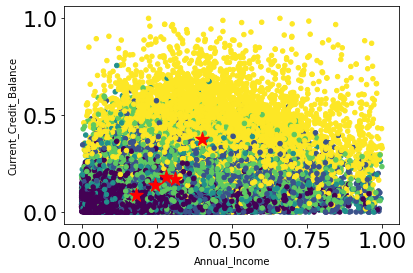

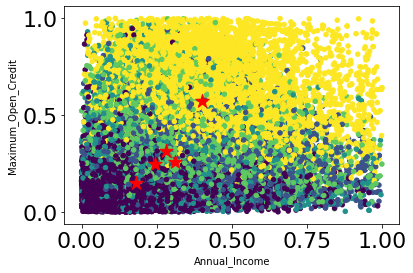

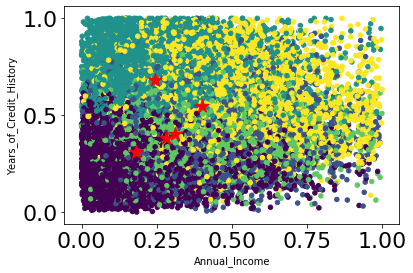

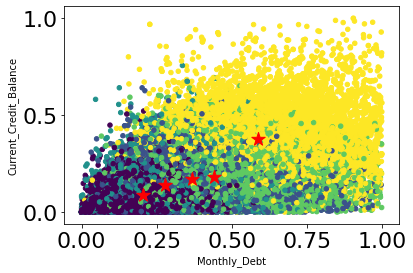

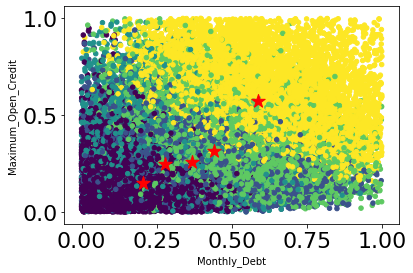

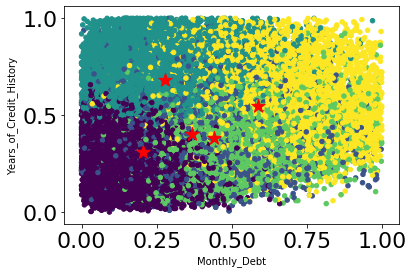

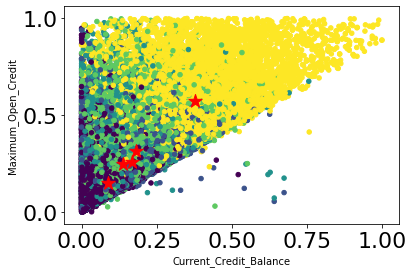

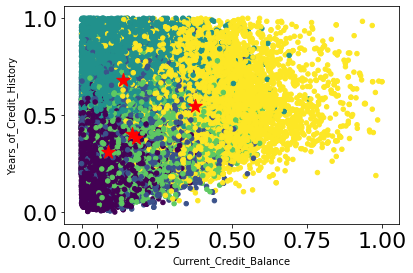

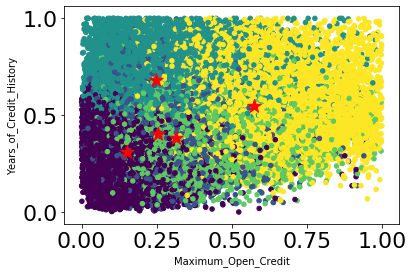

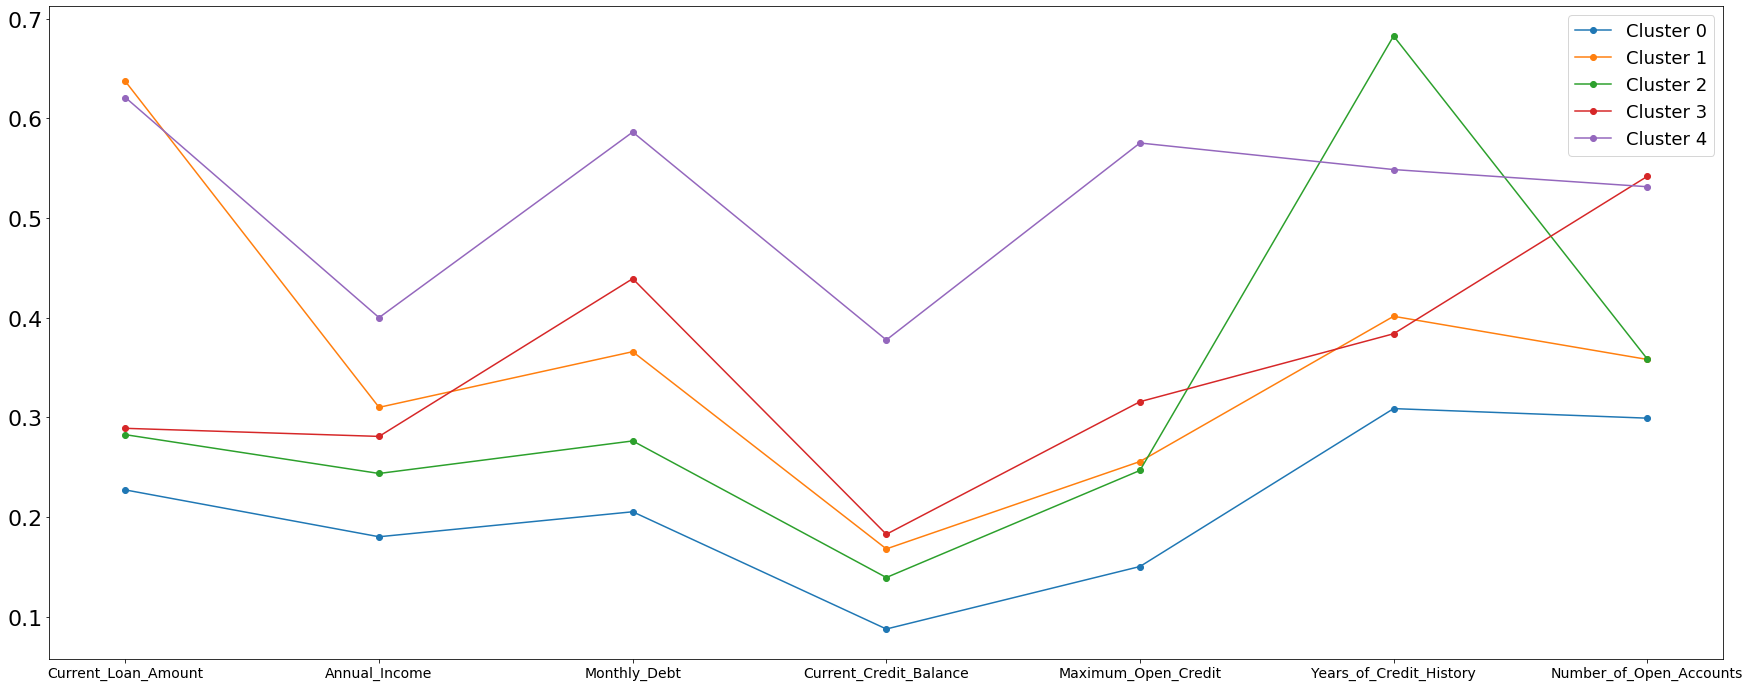

In [8]:
removed = []

for i in range(len(cont_var) - 1):
    for j in range(len(cont_var) - 1):
            if i != j and j not in removed:
                centers = kmeans.cluster_centers_
                plt.scatter(k[i], k[j], c=kmeans.labels_, s=20)
                plt.scatter(centers[:, i], centers[:, j], s=200, marker='*', color='r')
                plt.tick_params(axis='both', which='major', labelsize=22)
                plt.xlabel(cont_var[i])
                plt.ylabel(cont_var[j])
                plt.show()
    removed.append(i)

plt.figure(figsize=(30, 12))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(cont_var)), cont_var, fontsize=14)
plt.legend(fontsize=18)
plt.show()

Text(0, 0.5, 'Loan Status')

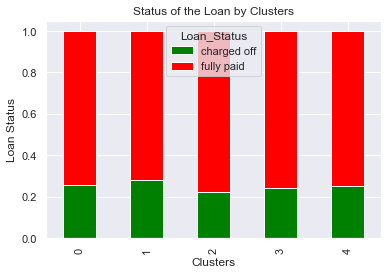

In [42]:
embarked_val_xt = pd.crosstab(kmeans.labels_, df['Loan_Status'])
embarked_val_xt_pct = embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True, color=['green','red'])
plt.title('Status of the Loan by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Loan Status')

Text(0, 0.5, 'Term')

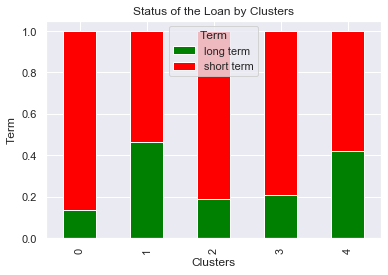

In [38]:
embarked_val_xt = pd.crosstab(kmeans.labels_, df['Term'])
embarked_val_xt_pct = embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True, color=['green','red'])
plt.title('Status of the Loan by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Term')

Text(0, 0.5, 'Home ownership')

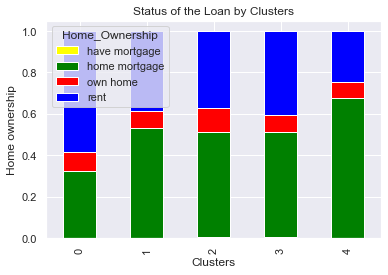

In [37]:
embarked_val_xt = pd.crosstab(kmeans.labels_, df['Home_Ownership'])
embarked_val_xt_pct = embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True, color=['yellow','green','red','blue'])
plt.title('Status of the Loan by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Home ownership')

Text(0, 0.5, 'Credit problems')

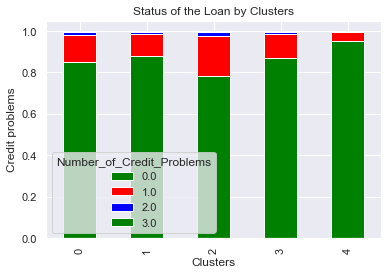

In [41]:
embarked_val_xt = pd.crosstab(kmeans.labels_, df['Number_of_Credit_Problems'])
embarked_val_xt_pct = embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True, color=['green','red','blue'])
plt.title('Status of the Loan by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Credit problems')

# 2.2 Analysis by density-based clustering
### 2.2.1 Choice of attributes and distance function

In [16]:
scaler = MinMaxScaler()
cont_var = ['Current_Loan_Amount', 'Annual_Income', 'Monthly_Debt', 'Current_Credit_Balance', 'Maximum_Open_Credit', 'Years_of_Credit_History', 'Number_of_Open_Accounts','Credit_Score']#,'Number_of_Credit_Problems']
x = df[cont_var].values #returns a numpy array
kdfS = scaler.fit_transform(x)
k = pd.DataFrame(kdfS)

### 2.2.2 Study of the clustering parameters

In [17]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, OPTICS
import seaborn as sns

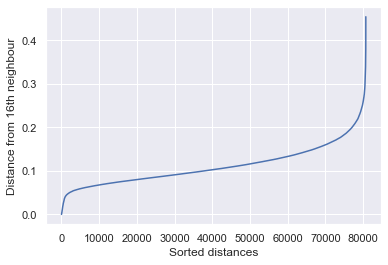

In [18]:
sns.set()
neigh = NearestNeighbors(n_neighbors=16)
nbrs = neigh.fit(kdfS)
distances, indices = nbrs.kneighbors(kdfS)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylabel('Distance from 16th neighbour')
plt.xlabel('Sorted distances')
plt.show()

In [19]:
dbscan = DBSCAN(eps=0.17, min_samples=16, metric='euclidean')
dbscan.fit(kdfS)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
silhouette = silhouette_score(kdfS, dbscan.labels_)
print(f'Number of clusters {len(set(dbscan.labels_))} ')
print('Labels %s' % dict(zip(bins, hist)))
print('Silhouette score %s' % silhouette)

Number of clusters 2 
Labels {-1: 21992, 0: 58731, 1: 0}
Silhouette score 0.236632481372219


Text(0, 0.5, 'Loan Status')

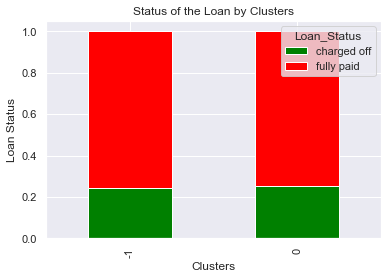

In [21]:
embarked_val_xt = pd.crosstab(dbscan.labels_, df['Loan_Status'])
embarked_val_xt_pct = embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True, color=['green','red'])
plt.title('Status of the Loan by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Loan Status')

Text(0, 0.5, 'Term')

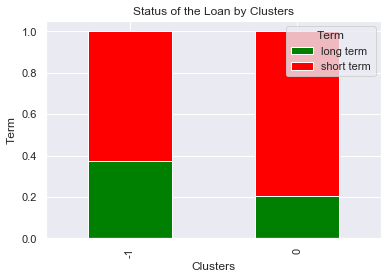

In [45]:
embarked_val_xt = pd.crosstab(dbscan.labels_, df['Term'])
embarked_val_xt_pct = embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True, color=['green','red'])
plt.title('Status of the Loan by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Term')

In [44]:
optics = OPTICS(min_samples=16, max_eps=0.17, metric='euclidean')
optics.fit(kdfS)

hist, bins = np.histogram(optics.labels_, bins=range(-1, len(set(optics.labels_)) + 1))
silhouette = silhouette_score(kdfS, optics.labels_)
print(f'Number of clusters {len(set(optics.labels_))} ')
print('Labels %s' % dict(zip(bins, hist)))
print('Silhouette score %s' % silhouette)

Number of clusters 2 
Labels {-1: 21992, 0: 58731, 1: 0}
Silhouette score 0.236632481372219


# 2.3 Analysis by hierarchical clustering
### 2.3.1 Choice of attributes and distance function

Same attributes of the k-means clustering, euclidean distance 

### 2.3.2 Show and discuss different dendograms using different algorithms 

In [4]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [5]:
scaler = MinMaxScaler()
cont_var = ['Current_Loan_Amount', 'Annual_Income', 'Monthly_Debt', 'Current_Credit_Balance', 'Maximum_Open_Credit', 'Years_of_Credit_History', 'Number_of_Open_Accounts','Credit_Score']#,'Number_of_Credit_Problems']
x = df[cont_var].values #returns a numpy array
kdfS = scaler.fit_transform(x)
k = pd.DataFrame(kdfS)

Since doing hierarchical clustering on the whole dataset would be too costly computationally, we apply undersampling

In [6]:
r=np.random.RandomState()
h_df = k.sample(frac=0.4, random_state=r)
h_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32289 entries, 73809 to 20500
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       32289 non-null  float64
 1   1       32289 non-null  float64
 2   2       32289 non-null  float64
 3   3       32289 non-null  float64
 4   4       32289 non-null  float64
 5   5       32289 non-null  float64
 6   6       32289 non-null  float64
 7   7       32289 non-null  float64
dtypes: float64(8)
memory usage: 2.2 MB


In [7]:
data_dist = pdist(h_df, metric='euclidean')
data_dist_man = pdist(h_df, metric='cityblock')

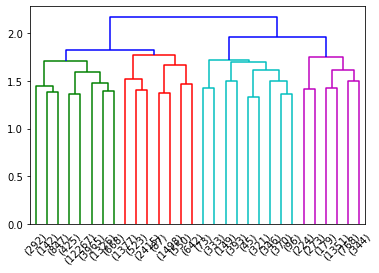

In [9]:
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.8, truncate_mode='lastp')

In [10]:
complete = AgglomerativeClustering(n_clusters=4,linkage="complete")
complete.fit(h_df)
hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
silhouette = silhouette_score(h_df, complete.labels_)
print(f'Number of clusters {len(set(complete.labels_))} ')
print('Labels %s' % dict(zip(bins, hist)))
print('Silhouette score %s' % silhouette)

Number of clusters 4 
Labels {0: 7092, 1: 3139, 2: 2126, 3: 19932}
Silhouette score 0.10427547156628444


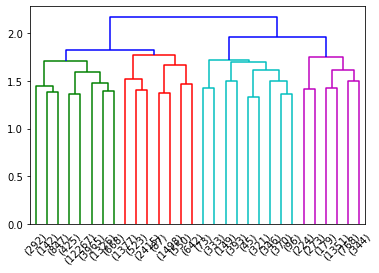

In [12]:
data_link = linkage(data_dist, method='complete', metric='manhattan')
res_man = dendrogram(data_link, color_threshold=1.8, truncate_mode='lastp')

In [13]:
complete = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage="complete")
complete.fit(h_df)
hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
silhouette = silhouette_score(h_df, complete.labels_)
print(f'Number of clusters {len(set(complete.labels_))} ')
print('Labels %s' % dict(zip(bins, hist)))
print('Silhouette score %s' % silhouette)

Number of clusters 4 
Labels {0: 18487, 1: 3507, 2: 6537, 3: 3758}
Silhouette score 0.09560874541718425


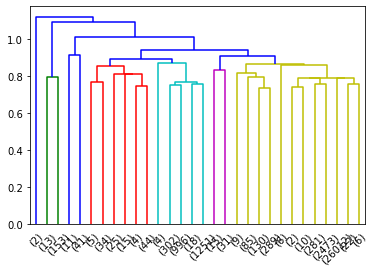

In [27]:
data_link_avg = linkage(data_dist, method='average', metric='euclidean')
res_avg = dendrogram(data_link_avg, color_threshold=0.875, truncate_mode='lastp')

In [29]:
complete = AgglomerativeClustering(n_clusters=None, linkage="average", distance_threshold=0.875)
complete.fit(h_df)
hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
silhouette = silhouette_score(h_df, complete.labels_)
print(f'Number of clusters {len(set(complete.labels_))} ')
print('Labels %s' % dict(zip(bins, hist)))
print('Silhouette score %s' % silhouette)

Number of clusters 8 
Labels {0: 2571, 1: 29325, 2: 46, 3: 127, 4: 41, 5: 11, 6: 166, 7: 2}
Silhouette score 0.1993527224427906


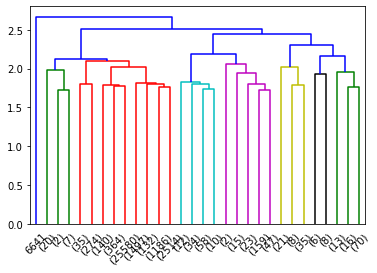

In [24]:
data_link = linkage(data_dist_man, method='average', metric='manhattan')
res_avg_man = dendrogram(data_link, color_threshold=2.1, truncate_mode='lastp')

In [25]:
complete = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage="average", distance_threshold=2.1)
complete.fit(h_df)
hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
silhouette = silhouette_score(h_df, complete.labels_)
print(f'Number of clusters {len(set(complete.labels_))} ')
print('Labels %s' % dict(zip(bins, hist)))
print('Silhouette score %s' % silhouette)

Number of clusters 8 
Labels {0: 31722, 1: 246, 2: 99, 3: 29, 4: 64, 5: 114, 6: 14, 7: 1}
Silhouette score 0.18185833400325432


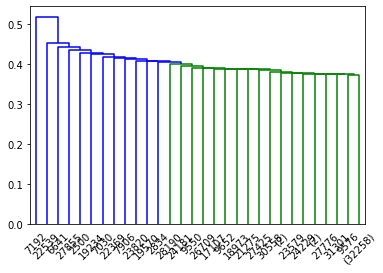

In [28]:
data_link_single = linkage(data_dist, method='single', metric='euclidean')
res_sin = dendrogram(data_link_single, color_threshold=0.4, truncate_mode='lastp')

In [30]:
complete = AgglomerativeClustering(n_clusters=None, linkage="single", distance_threshold=0.4)
complete.fit(h_df)
hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
silhouette = silhouette_score(h_df, complete.labels_)
print(f'Number of clusters {len(set(complete.labels_))} ')
print('Labels %s' % dict(zip(bins, hist)))
print('Silhouette score %s' % silhouette)

Number of clusters 13 
Labels {0: 32277, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1}
Silhouette score 0.24230662989456422


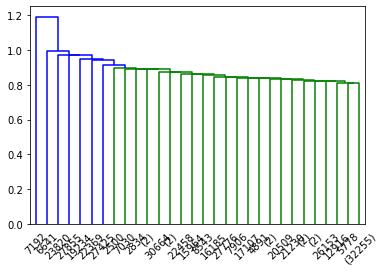

In [34]:
data_link = linkage(data_dist_man, method='single', metric='manhattan')
res_sin_man = dendrogram(data_link, color_threshold=0.9, truncate_mode='lastp')

In [35]:
complete = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage="single", distance_threshold=0.9)
complete.fit(h_df)
hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
silhouette = silhouette_score(h_df, complete.labels_)
print(f'Number of clusters {len(set(complete.labels_))} ')
print('Labels %s' % dict(zip(bins, hist)))
print('Silhouette score %s' % silhouette)

Number of clusters 8 
Labels {0: 32282, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}
Silhouette score 0.2923794831795192


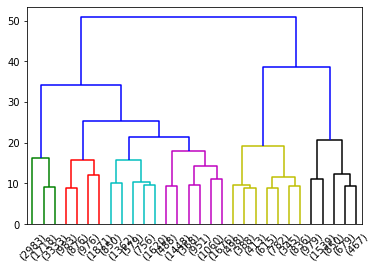

In [38]:
data_link_single = linkage(data_dist, method='ward', metric='euclidean')
res_sin = dendrogram(data_link_single, color_threshold=21, truncate_mode='lastp')

In [39]:
complete = AgglomerativeClustering(n_clusters=6,linkage="ward")
complete.fit(h_df)
hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
silhouette = silhouette_score(h_df, complete.labels_)
print(f'Number of clusters {len(set(complete.labels_))} ')
print('Labels %s' % dict(zip(bins, hist)))
print('Silhouette score %s' % silhouette)

Number of clusters 6 
Labels {0: 4514, 1: 5991, 2: 3877, 3: 8034, 4: 4706, 5: 5167}
Silhouette score 0.07736321611663653


In [ ]:
complete = AgglomerativeClustering(n_clusters=4,linkage="complete")
complete.fit(k)
hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))

In [41]:
silhouette = silhouette_score(k, complete.labels_)
print(f'Number of clusters {len(set(complete.labels_))} ')
print('Labels %s' % dict(zip(bins, hist)))
print('Silhouette score %s' % silhouette)

Number of clusters 4 
Labels {0: 18319, 1: 6915, 2: 54221, 3: 1268}
Silhouette score 0.14640580438767284


In [42]:
complete = AgglomerativeClustering(n_clusters=6,linkage="ward")
complete.fit(k)
hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
silhouette = silhouette_score(k, complete.labels_)
print(f'Number of clusters {len(set(complete.labels_))} ')
print('Labels %s' % dict(zip(bins, hist)))
print('Silhouette score %s' % silhouette)

Number of clusters 6 
Labels {0: 26015, 1: 18766, 2: 8102, 3: 10015, 4: 10816, 5: 7009}
Silhouette score 0.06396958446865941
